<a id="plan"></a>

<div style="font-variant: small-caps; 
      font-weight: normal; 
      font-size: 35px; 
      text-align: center">
      Predicting a song's populatiry on Spotify with Random Forrests<br><br>
  </div> 
  
  <div style="font-variant: small-caps; 
      font-weight: normal; 
      font-size: 20px; 
      text-align: center; 
      padding: 15px; 
      margin: 10px;">
      Justine Ferret, Arthur Guyart et Yanis Martinet
  </div>

### Imports

In [7]:
%load_ext autoreload
%autoreload 2

%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [8]:
# base modules
import os
import sys
import copy
import logging

# custom module
from emlyon_module.imports import *
from emlyon_module.structured import *

# for manipulating data
from pandas_summary import DataFrameSummary

# for Machine Learning
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier, BaggingRegressor
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score, KFold, GridSearchCV

# for visualization
from IPython.display import display
from matplotlib import pyplot as plt
# plotly
# seaborn
# altair

ModuleNotFoundError: No module named 'emlyon_module'

In [9]:
path_to_repo = os.path.dirname(os.getcwd())

path_to_bulldozers = os.path.join(path_to_repo, "data", "bulldozers", "")

In [10]:
path_to_bulldozers

'/Users/yanismartinet/Documents/GitHub/data/bulldozers/'

In [5]:
!ls {path_to_bulldozers}

Train.csv Train.zip


# 1. Data Inspection

<a id="about"></a>

### $\bullet$ About the dataset and Kaggle

[Back to top](#plan)

We will be looking at the Blue Book for Bulldozers Kaggle Competition: "The goal of the contest is to predict the sale price of a particular piece of heavy equiment at auction based on it's usage, equipment type, and configuration.  The data is sourced from auction result postings and includes information on usage and equipment configurations."

This is a very common type of dataset and prediciton problem, and similar to what you may see in your project or workplace.

Kaggle is an awesome resource for aspiring data scientists or anyone looking to improve their machine learning skills.  There is nothing like being able to get hands-on practice and receiving real-time feedback to help you improve your skills.

Kaggle provides:

1. Interesting data sets
2. Feedback on how you're doing
3. A leader board to see what's good, what's possible, and what's state-of-art.
4. Blog posts by winning contestants share useful tips and techniques.



Kaggle provides info about some of the fields of our dataset; on the [Kaggle Data info](https://www.kaggle.com/c/bluebook-for-bulldozers/data) page they say the following:

For this competition, you are predicting the sale price of bulldozers sold at auctions. The data for this competition is split into three parts:

- **Train.csv** is the training set, which contains data through the end of 2011.
- **Valid.csv** is the validation set, which contains data from January 1, 2012 - April 30, 2012. You make predictions on this set throughout the majority of the competition. Your score on this set is used to create the public leaderboard.
- **Test.csv** is the test set, which won't be released until the last week of the competition. It contains data from May 1, 2012 - November 2012. Your score on the test set determines your final rank for the competition.

<a id="load_data"></a>

### $\bullet$ Import the data

[Back to top](#plan)

In [6]:
# chose one of the equivalent 
path_to_datasets = os.path.join(path_to_bulldozers, 'Train.csv')
print(path_to_datasets)

path_to_datasets = '{}Train.csv'.format(path_to_bulldozers)
print(path_to_datasets)

/Users/yanismartinet/ML/Archive/data/bulldozers/Train.csv
/Users/yanismartinet/ML/Archive/data/bulldozers/Train.csv


In [7]:
path_to_zip = os.path.join(path_to_bulldozers, 'Train.zip')
import zipfile
with zipfile.ZipFile(path_to_zip,"r") as zip_ref:
    zip_ref.extractall("Train")

In [8]:
path = '/Users/savinien/Desktop/Teaching/Certificats/Prototype-IA/ML/EMLyon\ -\ Machine\ Learning\ Course/data/bulldozers/'

In [9]:
!ls {path}

ls: /Users/savinien/Desktop/Teaching/Certificats/Prototype-IA/ML/EMLyon - Machine Learning Course/data/bulldozers/: No such file or directory


In [10]:
!head {path}/Train.csv

head: /Users/savinien/Desktop/Teaching/Certificats/Prototype-IA/ML/EMLyon - Machine Learning Course/data/bulldozers//Train.csv: No such file or directory


In [11]:
df_raw = pd.read_csv(path_to_datasets, low_memory = False, parse_dates = ["saledate"])

<a id="look_data"></a>

### $\bullet$ Look at the data

[Back to top](#plan)

In any sort of data science work, it's **important to look at your data**, to make sure you understand the format, how it's stored, what type of values it holds, etc.<br> 
Even if you've read descriptions about your data, the actual data may not be what you expect.

The key fields that are in train.csv are:

- SalesID: the unique identifier of the sale
- MachineID: the unique identifier of a machine.  A machine can be sold multiple times
- saleprice: what the machine sold for at auction (only provided in train.csv)
- saledate: the date of the sale

In [13]:
df_raw.dtypes

SalesID                              int64
SalePrice                            int64
MachineID                            int64
ModelID                              int64
datasource                           int64
auctioneerID                       float64
YearMade                             int64
MachineHoursCurrentMeter           float64
UsageBand                           object
saledate                    datetime64[ns]
fiModelDesc                         object
fiBaseModel                         object
fiSecondaryDesc                     object
fiModelSeries                       object
fiModelDescriptor                   object
ProductSize                         object
fiProductClassDesc                  object
state                               object
ProductGroup                        object
ProductGroupDesc                    object
Drive_System                        object
Enclosure                           object
Forks                               object
Pad_Type   

In [14]:
# print the 5 first and last rows
df_raw

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1139246,66000,999089,3157,121,3.0,2004,68.0,Low,2006-11-16,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
1,1139248,57000,117657,77,121,3.0,1996,4640.0,Low,2004-03-26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1139249,10000,434808,7009,121,3.0,2001,2838.0,High,2004-02-26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1139251,38500,1026470,332,121,3.0,2001,3486.0,High,2011-05-19,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1139253,11000,1057373,17311,121,3.0,2007,722.0,Medium,2009-07-23,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
401120,6333336,10500,1840702,21439,149,1.0,2005,NaN,NaN,2011-11-02,...,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
401121,6333337,11000,1830472,21439,149,1.0,2005,NaN,NaN,2011-11-02,...,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
401122,6333338,11500,1887659,21439,149,1.0,2005,NaN,NaN,2011-11-02,...,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
401123,6333341,9000,1903570,21435,149,2.0,2005,NaN,NaN,2011-10-25,...,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN


In [15]:
# print the first n rows (default is n = 5)
#df_raw.head(n = 3)
df_raw.head(3)

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1139246,66000,999089,3157,121,3.0,2004,68.0,Low,2006-11-16,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
1,1139248,57000,117657,77,121,3.0,1996,4640.0,Low,2004-03-26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1139249,10000,434808,7009,121,3.0,2001,2838.0,High,2004-02-26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
help(df_raw.head)

Help on method head in module pandas.core.generic:

head(n:int=5) -> ~FrameOrSeries method of pandas.core.frame.DataFrame instance
    Return the first `n` rows.
    
    This function returns the first `n` rows for the object based
    on position. It is useful for quickly testing if your object
    has the right type of data in it.
    
    For negative values of `n`, this function returns all rows except
    the last `n` rows, equivalent to ``df[:-n]``.
    
    Parameters
    ----------
    n : int, default 5
        Number of rows to select.
    
    Returns
    -------
    same type as caller
        The first `n` rows of the caller object.
    
    See Also
    --------
    DataFrame.tail: Returns the last `n` rows.
    
    Examples
    --------
    >>> df = pd.DataFrame({'animal': ['alligator', 'bee', 'falcon', 'lion',
    ...                    'monkey', 'parrot', 'shark', 'whale', 'zebra']})
    >>> df
          animal
    0  alligator
    1        bee
    2     falcon
    3

<a id="look_columns"></a>

### $\bullet$ Look at the columns

[Back to top](#plan)

In [17]:
df_raw.columns

Index(['SalesID', 'SalePrice', 'MachineID', 'ModelID', 'datasource',
       'auctioneerID', 'YearMade', 'MachineHoursCurrentMeter', 'UsageBand',
       'saledate', 'fiModelDesc', 'fiBaseModel', 'fiSecondaryDesc',
       'fiModelSeries', 'fiModelDescriptor', 'ProductSize',
       'fiProductClassDesc', 'state', 'ProductGroup', 'ProductGroupDesc',
       'Drive_System', 'Enclosure', 'Forks', 'Pad_Type', 'Ride_Control',
       'Stick', 'Transmission', 'Turbocharged', 'Blade_Extension',
       'Blade_Width', 'Enclosure_Type', 'Engine_Horsepower', 'Hydraulics',
       'Pushblock', 'Ripper', 'Scarifier', 'Tip_Control', 'Tire_Size',
       'Coupler', 'Coupler_System', 'Grouser_Tracks', 'Hydraulics_Flow',
       'Track_Type', 'Undercarriage_Pad_Width', 'Stick_Length', 'Thumb',
       'Pattern_Changer', 'Grouser_Type', 'Backhoe_Mounting', 'Blade_Type',
       'Travel_Controls', 'Differential_Type', 'Steering_Controls'],
      dtype='object')

In [18]:
len(df_raw.columns)

53

In [19]:
def display_all(df):
    with pd.option_context("display.max_rows", 1000, "display.max_columns", 1000): 
        display(df)

In [20]:
df_raw.shape

(401125, 53)

In [21]:
display_all(df_raw.head().T)

,0,1,2,3,4
SalesID,1139246,1139248,1139249,1139251,1139253
SalePrice,66000,57000,10000,38500,11000
MachineID,999089,117657,434808,1026470,1057373
ModelID,3157,77,7009,332,17311
datasource,121,121,121,121,121
auctioneerID,3,3,3,3,3
YearMade,2004,1996,2001,2001,2007
MachineHoursCurrentMeter,68,4640,2838,3486,722
UsageBand,Low,Low,High,High,Medium
saledate,2006-11-16 00:00:00,2004-03-26 00:00:00,2004-02-26 00:00:00,2011-05-19 00:00:00,2009-07-23 00:00:00


In [22]:
display_all(df_raw.describe(include='all', datetime_is_numeric=True).T)

,count,unique,top,freq,mean,min,25%,50%,75%,max,std
SalesID,401125,NaN,NaN,NaN,1.91971e+06,1.13925e+06,1.41837e+06,1.63942e+06,2.24271e+06,6.33334e+06,909021
SalePrice,401125,NaN,NaN,NaN,31099.7,4750,14500,24000,40000,142000,23036.9
MachineID,401125,NaN,NaN,NaN,1.2179e+06,0,1.0887e+06,1.27949e+06,1.46807e+06,2.48633e+06,440992
ModelID,401125,NaN,NaN,NaN,6889.7,28,3259,4604,8724,37198,6221.78
datasource,401125,NaN,NaN,NaN,134.666,121,132,132,136,172,8.96224
auctioneerID,380989,NaN,NaN,NaN,6.55604,0,1,2,4,99,16.9768
YearMade,401125,NaN,NaN,NaN,1899.16,1000,1985,1995,2000,2013,291.797
MachineHoursCurrentMeter,142765,NaN,NaN,NaN,3457.96,0,0,0,3025,2.4833e+06,27590.3
UsageBand,69639,3,Medium,33985,NaN,NaN,NaN,NaN,NaN,NaN,NaN
saledate,401125,NaN,NaN,NaN,2004-08-02 07:47:13.986413184,1989-01-17 00:00:00,2000-10-07 00:00:00,2006-03-23 00:00:00,2009-03-24 00:00:00,2011-12-30 00:00:00,NaN


# 2. Data Preprocessing

<a id="output_variable"></a>

### $\bullet$ Variable to predict

[Back to top](#plan)

The variable we want to predict is the sale price of a bulldozer, based on its description. This means that we seek to **predict** values within the _SalePrice_ column of the dataset, by using the other columns as **expainatory variables** for prediction.

It's important to note what metric is being used for a project. Generally, selecting the metric(s) is an important part of the project setup. However, in this case Kaggle tells us what metric to use: RMSLE (root mean squared log error) between the actual and predicted auction prices. Therefore we take the log of the prices, so that RMSE will give us what we need.

In [23]:
df_raw.SalePrice

0         66000
1         57000
2         10000
3         38500
4         11000
          ...  
401120    10500
401121    11000
401122    11500
401123     9000
401124     7750
Name: SalePrice, Length: 401125, dtype: int64

In [24]:
sale_prices = df_raw.SalePrice.tolist()

In [25]:
df_raw.SalePrice = np.log(df_raw.SalePrice)

In [26]:
df_raw.SalePrice

0         11.097410
1         10.950807
2          9.210340
3         10.558414
4          9.305651
            ...    
401120     9.259131
401121     9.305651
401122     9.350102
401123     9.104980
401124     8.955448
Name: SalePrice, Length: 401125, dtype: float64

In [27]:
# same as 
# df_raw.SalePrice
df_raw['SalePrice']

0         11.097410
1         10.950807
2          9.210340
3         10.558414
4          9.305651
            ...    
401120     9.259131
401121     9.305651
401122     9.350102
401123     9.104980
401124     8.955448
Name: SalePrice, Length: 401125, dtype: float64

In [28]:
df_raw.columns

Index(['SalesID', 'SalePrice', 'MachineID', 'ModelID', 'datasource',
       'auctioneerID', 'YearMade', 'MachineHoursCurrentMeter', 'UsageBand',
       'saledate', 'fiModelDesc', 'fiBaseModel', 'fiSecondaryDesc',
       'fiModelSeries', 'fiModelDescriptor', 'ProductSize',
       'fiProductClassDesc', 'state', 'ProductGroup', 'ProductGroupDesc',
       'Drive_System', 'Enclosure', 'Forks', 'Pad_Type', 'Ride_Control',
       'Stick', 'Transmission', 'Turbocharged', 'Blade_Extension',
       'Blade_Width', 'Enclosure_Type', 'Engine_Horsepower', 'Hydraulics',
       'Pushblock', 'Ripper', 'Scarifier', 'Tip_Control', 'Tire_Size',
       'Coupler', 'Coupler_System', 'Grouser_Tracks', 'Hydraulics_Flow',
       'Track_Type', 'Undercarriage_Pad_Width', 'Stick_Length', 'Thumb',
       'Pattern_Changer', 'Grouser_Type', 'Backhoe_Mounting', 'Blade_Type',
       'Travel_Controls', 'Differential_Type', 'Steering_Controls'],
      dtype='object')

<a id="naive_training"></a>

### $\bullet$ Naive first model training

[Back to top](#plan)

In [29]:
m = RandomForestRegressor(n_jobs=-1)

In [30]:
# The following code is supposed to fail due to string values in the input data
m.fit(df_raw.drop('SalePrice', axis = 1), df_raw.SalePrice)

ValueError: could not convert string to float: 'Low'

This dataset contains a mix of **continuous** and **categorical** variables.

The following method extracts particular date fields from a complete datetime for the purpose of constructing categoricals.  You should always consider this feature extraction step when working with date-time. Without expanding your date-time into these additional fields, you can't capture any trend/cyclical behavior as a function of time at any of these granularities.

In any sort of data science work, it's **important to look at your data**, to make sure you understand the format, how it's stored, what type of values it holds, etc. Even if you've read descriptions about your data, the actual data may not be what you expect.

<a id="convert_date"></a>

### $\bullet$ Convert date times

[Back to top](#plan)

In [31]:
df_raw.columns

Index(['SalesID', 'SalePrice', 'MachineID', 'ModelID', 'datasource',
       'auctioneerID', 'YearMade', 'MachineHoursCurrentMeter', 'UsageBand',
       'saledate', 'fiModelDesc', 'fiBaseModel', 'fiSecondaryDesc',
       'fiModelSeries', 'fiModelDescriptor', 'ProductSize',
       'fiProductClassDesc', 'state', 'ProductGroup', 'ProductGroupDesc',
       'Drive_System', 'Enclosure', 'Forks', 'Pad_Type', 'Ride_Control',
       'Stick', 'Transmission', 'Turbocharged', 'Blade_Extension',
       'Blade_Width', 'Enclosure_Type', 'Engine_Horsepower', 'Hydraulics',
       'Pushblock', 'Ripper', 'Scarifier', 'Tip_Control', 'Tire_Size',
       'Coupler', 'Coupler_System', 'Grouser_Tracks', 'Hydraulics_Flow',
       'Track_Type', 'Undercarriage_Pad_Width', 'Stick_Length', 'Thumb',
       'Pattern_Changer', 'Grouser_Type', 'Backhoe_Mounting', 'Blade_Type',
       'Travel_Controls', 'Differential_Type', 'Steering_Controls'],
      dtype='object')

In [32]:
df_raw.fiModelDesc.value_counts()

310G         5039
416C         4869
580K         4315
310E         4233
140G         4083
             ... 
DX175           1
D4HIIILGP       1
515CH           1
450PLUS         1
D21PL           1
Name: fiModelDesc, Length: 4999, dtype: int64

In [33]:
df_raw.saledate

0        2006-11-16
1        2004-03-26
2        2004-02-26
3        2011-05-19
4        2009-07-23
            ...    
401120   2011-11-02
401121   2011-11-02
401122   2011-11-02
401123   2011-10-25
401124   2011-10-25
Name: saledate, Length: 401125, dtype: datetime64[ns]

In [34]:
fld = df_raw.saledate

In [35]:
fld

0        2006-11-16
1        2004-03-26
2        2004-02-26
3        2011-05-19
4        2009-07-23
            ...    
401120   2011-11-02
401121   2011-11-02
401122   2011-11-02
401123   2011-10-25
401124   2011-10-25
Name: saledate, Length: 401125, dtype: datetime64[ns]

In [36]:
# date-time object, was created within the df with parse_dates=["saledate"]
fld.dt

In [37]:
add_datepart

<function emlyon_module.structured.add_datepart(df, fldnames, drop=True, time=False, errors='raise')>

In [38]:
help(add_datepart)

Help on function add_datepart in module emlyon_module.structured:

add_datepart(df, fldnames, drop=True, time=False, errors='raise')
    add_datepart converts a column of df from a datetime64 to many columns containing
    the information from the date. This applies changes inplace.
        
    Parameters:
    -----------
    df: A pandas data frame. df gain several new columns.
    fldname: A string or list of strings that is the name of the date column you wish to expand.
        If it is not a datetime64 series, it will be converted to one with pd.to_datetime.
    drop: If true then the original date column will be removed.
    time: If true time features: Hour, Minute, Second will be added.
    Examples:
    ---------
    >>> df = pd.DataFrame({ 'A' : pd.to_datetime(['3/11/2000', '3/12/2000', '3/13/2000'], infer_datetime_format=False) })
    >>> df
        A
    0   2000-03-11
    1   2000-03-12
    2   2000-03-13
    >>> add_datepart(df, 'A')
    >>> df
        AYear AMonth AWeek

In [39]:
??add_datepart

In [40]:
# exemple of utilisation of copy.deepcopy to avoid inplace operations
dicto = {'key' : 0}

def modifyDict(python_dict: dict):
    dict_copy = copy.deepcopy(python_dict)
    dict_copy['key2'] = 1
    return dict_copy

dicto2 = modifyDict(dicto)

print(dicto2)

{'key': 0, 'key2': 1}


In [41]:
df_backup = copy.deepcopy(df_raw)

In [42]:
# add_datepart adds new columns to the dataframe, INPLACE
add_datepart(df_raw, 'saledate')

/Users/yanismartinet/ML/Archive/notebooks/emlyon_module/structured.py:124: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  for n in attr: df[targ_pre + n] = getattr(fld.dt, n.lower())


In [43]:
# comparaison of dataframe shape before & after applying add_datepart
print(df_backup.shape)
print(df_raw.shape)

(401125, 53)
(401125, 65)


In [44]:
df_raw.saleYear.head()

0    2006
1    2004
2    2004
3    2011
4    2009
Name: saleYear, dtype: int64

In [45]:
df_raw.columns

Index(['SalesID', 'SalePrice', 'MachineID', 'ModelID', 'datasource',
       'auctioneerID', 'YearMade', 'MachineHoursCurrentMeter', 'UsageBand',
       'fiModelDesc', 'fiBaseModel', 'fiSecondaryDesc', 'fiModelSeries',
       'fiModelDescriptor', 'ProductSize', 'fiProductClassDesc', 'state',
       'ProductGroup', 'ProductGroupDesc', 'Drive_System', 'Enclosure',
       'Forks', 'Pad_Type', 'Ride_Control', 'Stick', 'Transmission',
       'Turbocharged', 'Blade_Extension', 'Blade_Width', 'Enclosure_Type',
       'Engine_Horsepower', 'Hydraulics', 'Pushblock', 'Ripper', 'Scarifier',
       'Tip_Control', 'Tire_Size', 'Coupler', 'Coupler_System',
       'Grouser_Tracks', 'Hydraulics_Flow', 'Track_Type',
       'Undercarriage_Pad_Width', 'Stick_Length', 'Thumb', 'Pattern_Changer',
       'Grouser_Type', 'Backhoe_Mounting', 'Blade_Type', 'Travel_Controls',
       'Differential_Type', 'Steering_Controls', 'saleYear', 'saleMonth',
       'saleWeek', 'saleDay', 'saleDayofweek', 'saleDayofyear',


In [46]:
df_raw.saleDayofweek

0         3
1         4
2         3
3         3
4         3
         ..
401120    2
401121    2
401122    2
401123    1
401124    1
Name: saleDayofweek, Length: 401125, dtype: int64

In [47]:
len(df_raw.columns)

65

<a id="convert_strings"></a>

### $\bullet$ Convert strings into numerotated categories

[Back to top](#plan)

The categorical variables are currently stored as strings, which is inefficient, and doesn't provide the numeric coding required for a random forest. Therefore we call `train_cats` to convert strings to pandas categories.

In [48]:
df_raw.dtypes

SalesID                   int64
SalePrice               float64
MachineID                 int64
ModelID                   int64
datasource                int64
                         ...   
saleIs_quarter_end         bool
saleIs_quarter_start       bool
saleIs_year_end            bool
saleIs_year_start          bool
saleElapsed               int64
Length: 65, dtype: object

In [49]:
help(train_cats)

Help on function train_cats in module emlyon_module.structured:

train_cats(df)
    Change any columns of strings in a panda's dataframe to a column of
    categorical values. This applies the changes inplace.
    Parameters:
    -----------
    df: A pandas dataframe. Any columns of strings will be changed to
        categorical values.
    Examples:
    ---------
    >>> df = pd.DataFrame({'col1' : [1, 2, 3], 'col2' : ['a', 'b', 'a']})
    >>> df
       col1 col2
    0     1    a
    1     2    b
    2     3    a
    note the type of col2 is string
    >>> train_cats(df)
    >>> df
       col1 col2
    0     1    a
    1     2    b
    2     3    a
    now the type of col2 is category



In [50]:
??train_cats

In [51]:
train_cats(df_raw)

We can specify the order to use for categorical variables if we wish:

In [52]:
df_raw.UsageBand

0            Low
1            Low
2           High
3           High
4         Medium
           ...  
401120       NaN
401121       NaN
401122       NaN
401123       NaN
401124       NaN
Name: UsageBand, Length: 401125, dtype: category
Categories (3, object): ['High' < 'Low' < 'Medium']

In [53]:
df_raw.UsageBand.cat.categories.tolist()

['High', 'Low', 'Medium']

In [54]:
df_raw.UsageBand.cat.set_categories(['Low', 'Medium', 'High'], ordered=True, inplace=True)

In [55]:
df_raw.UsageBand.cat.categories.tolist()

['Low', 'Medium', 'High']

Normally, pandas will continue displaying the text categories, while treating them as numerical data internally. Optionally, we can replace the text categories with numbers, which will make this variable non-categorical, like so:.

In [56]:
df_raw.UsageBand

0            Low
1            Low
2           High
3           High
4         Medium
           ...  
401120       NaN
401121       NaN
401122       NaN
401123       NaN
401124       NaN
Name: UsageBand, Length: 401125, dtype: category
Categories (3, object): ['Low' < 'Medium' < 'High']

In [57]:
df_raw.UsageBand.cat.categories

Index(['Low', 'Medium', 'High'], dtype='object')

In [58]:
df_raw.UsageBand.cat.codes

0         0
1         0
2         2
3         2
4         1
         ..
401120   -1
401121   -1
401122   -1
401123   -1
401124   -1
Length: 401125, dtype: int8

In [59]:
# This step overwrites the raw categories with integers
df_raw.UsageBand = df_raw.UsageBand.cat.codes

In [60]:
# - values corresponds to NaN values in the original column
df_raw.UsageBand

0         0
1         0
2         2
3         2
4         1
         ..
401120   -1
401121   -1
401122   -1
401123   -1
401124   -1
Name: UsageBand, Length: 401125, dtype: int8

<a id="nans"></a>

### $\bullet$ Inspect missing values

[Back to top](#plan)

We're still not quite done - for instance we have lots of missing values, which we can't pass directly to a random forest.

In [61]:
df_raw.isnull().describe()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,...,saleDay,saleDayofweek,saleDayofyear,saleIs_month_end,saleIs_month_start,saleIs_quarter_end,saleIs_quarter_start,saleIs_year_end,saleIs_year_start,saleElapsed
count,401125,401125,401125,401125,401125,401125,401125,401125,401125,401125,...,401125,401125,401125,401125,401125,401125,401125,401125,401125,401125
unique,1,1,1,1,1,2,1,2,1,1,...,1,1,1,1,1,1,1,1,1,1
top,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
freq,401125,401125,401125,401125,401125,380989,401125,258360,401125,401125,...,401125,401125,401125,401125,401125,401125,401125,401125,401125,401125


In [62]:
display_all(df_raw.isnull().describe().T)

,count,unique,top,freq
SalesID,401125,1,False,401125
SalePrice,401125,1,False,401125
MachineID,401125,1,False,401125
ModelID,401125,1,False,401125
datasource,401125,1,False,401125
auctioneerID,401125,2,False,380989
YearMade,401125,1,False,401125
MachineHoursCurrentMeter,401125,2,True,258360
UsageBand,401125,1,False,401125
fiModelDesc,401125,1,False,401125


In [63]:
# display amount of missing values per column :
# column name              ratio of nans
display_all(df_raw.isnull().sum().sort_index()/len(df_raw))

Backhoe_Mounting            0.803872
Blade_Extension             0.937129
Blade_Type                  0.800977
Blade_Width                 0.937129
Coupler                     0.466620
Coupler_System              0.891660
Differential_Type           0.826959
Drive_System                0.739829
Enclosure                   0.000810
Enclosure_Type              0.937129
Engine_Horsepower           0.937129
Forks                       0.521154
Grouser_Tracks              0.891899
Grouser_Type                0.752813
Hydraulics                  0.200823
Hydraulics_Flow             0.891899
MachineHoursCurrentMeter    0.644089
MachineID                   0.000000
ModelID                     0.000000
Pad_Type                    0.802720
Pattern_Changer             0.752651
ProductGroup                0.000000
ProductGroupDesc            0.000000
ProductSize                 0.525460
Pushblock                   0.937129
Ride_Control                0.629527
Ripper                      0.740388
S

<a id="save_data"></a>

### $\bullet$ Save preprocessed data

[Back to top](#plan)

But let's save this file for now, since it's already in a format which can be stored and accessed efficiently.

In [64]:
path_to_tmp = os.path.join(path_to_repo, "data", "tmp")

In [65]:
path_to_tmp

'/Users/yanismartinet/ML/Archive/data/tmp'

In [66]:
os.makedirs(path_to_tmp, exist_ok = True)

In [67]:
path_to_bulldozers_raw = os.path.join(path_to_tmp, 'bulldozers-raw')

In [68]:
path_to_bulldozers_raw

'/Users/yanismartinet/ML/Archive/data/tmp/bulldozers-raw'

In [69]:
# 18 MB
df_raw.to_feather(path_to_bulldozers_raw)

In [70]:
# 140 MB !!
df_raw.to_csv(path_to_bulldozers_raw + '.csv', index = False)

In [71]:
help(df_raw.to_csv)

Help on method to_csv in module pandas.core.generic:

to_csv(path_or_buf:Union[str, pathlib.Path, IO[~AnyStr], NoneType]=None, sep:str=',', na_rep:str='', float_format:Union[str, NoneType]=None, columns:Union[Sequence[collections.abc.Hashable], NoneType]=None, header:Union[bool, List[str]]=True, index:bool=True, index_label:Union[bool, str, Sequence[collections.abc.Hashable], NoneType]=None, mode:str='w', encoding:Union[str, NoneType]=None, compression:Union[str, Mapping[str, str], NoneType]='infer', quoting:Union[int, NoneType]=None, quotechar:str='"', line_terminator:Union[str, NoneType]=None, chunksize:Union[int, NoneType]=None, date_format:Union[str, NoneType]=None, doublequote:bool=True, escapechar:Union[str, NoneType]=None, decimal:Union[str, NoneType]='.', errors:str='strict') -> Union[str, NoneType] method of pandas.core.frame.DataFrame instance
    Write object to a comma-separated values (csv) file.
    
    .. versionchanged:: 0.24.0
        The order of arguments for Series

<a id="numericalize_data"></a>

### $\bullet$ Fully numericalize data

[Back to top](#plan)

In the future we can simply read it from this fast format.

In [72]:
path_to_bulldozers_raw = os.path.join(path_to_repo, 'data', 'tmp', 'bulldozers-raw')

df_raw = pd.read_feather(path_to_bulldozers_raw)
# or
#df_raw = pd.read_csv(path_to_bulldozers_raw + '.csv', low_memory = False)

We'll replace categories with their numeric codes, handle missing continuous values, and split the dependent variable into a separate variable.

In [73]:
help(proc_df)

Help on function proc_df in module emlyon_module.structured:

proc_df(df, y_fld=None, skip_flds=None, ignore_flds=None, do_scale=False, na_dict=None, preproc_fn=None, max_n_cat=None, subset=None, mapper=None)
    proc_df takes a data frame df and splits off the response variable, and
    changes the df into an entirely numeric dataframe. For each column of df 
    which is not in skip_flds nor in ignore_flds, na values are replaced by the
    median value of the column.
    Parameters:
    -----------
    df: The data frame you wish to process.
    y_fld: The name of the response variable
    skip_flds: A list of fields that dropped from df.
    ignore_flds: A list of fields that are ignored during processing.
    do_scale: Standardizes each column in df. Takes Boolean Values(True,False)
    na_dict: a dictionary of na columns to add. Na columns are also added if there
        are any missing values.
    preproc_fn: A function that gets applied to df.
    max_n_cat: The maximum number 

In [74]:
??proc_df

In [75]:
??fix_missing

In [76]:
??numericalize

In [77]:
df, y, nas = proc_df(df_raw, 'SalePrice')

In [78]:
df.columns

Index(['SalesID', 'MachineID', 'ModelID', 'datasource', 'auctioneerID',
       'YearMade', 'MachineHoursCurrentMeter', 'UsageBand', 'fiModelDesc',
       'fiBaseModel', 'fiSecondaryDesc', 'fiModelSeries', 'fiModelDescriptor',
       'ProductSize', 'fiProductClassDesc', 'state', 'ProductGroup',
       'ProductGroupDesc', 'Drive_System', 'Enclosure', 'Forks', 'Pad_Type',
       'Ride_Control', 'Stick', 'Transmission', 'Turbocharged',
       'Blade_Extension', 'Blade_Width', 'Enclosure_Type', 'Engine_Horsepower',
       'Hydraulics', 'Pushblock', 'Ripper', 'Scarifier', 'Tip_Control',
       'Tire_Size', 'Coupler', 'Coupler_System', 'Grouser_Tracks',
       'Hydraulics_Flow', 'Track_Type', 'Undercarriage_Pad_Width',
       'Stick_Length', 'Thumb', 'Pattern_Changer', 'Grouser_Type',
       'Backhoe_Mounting', 'Blade_Type', 'Travel_Controls',
       'Differential_Type', 'Steering_Controls', 'saleYear', 'saleMonth',
       'saleWeek', 'saleDay', 'saleDayofweek', 'saleDayofyear',
       'saleI

In [79]:
df.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,saleDayofyear,saleIs_month_end,saleIs_month_start,saleIs_quarter_end,saleIs_quarter_start,saleIs_year_end,saleIs_year_start,saleElapsed,auctioneerID_na,MachineHoursCurrentMeter_na
0,1139246,999089,3157,121,3.0,2004,68.0,0,950,296,...,320,False,False,False,False,False,False,1163635200,False,False
1,1139248,117657,77,121,3.0,1996,4640.0,0,1725,527,...,86,False,False,False,False,False,False,1080259200,False,False
2,1139249,434808,7009,121,3.0,2001,2838.0,2,331,110,...,57,False,False,False,False,False,False,1077753600,False,False
3,1139251,1026470,332,121,3.0,2001,3486.0,2,3674,1375,...,139,False,False,False,False,False,False,1305763200,False,False
4,1139253,1057373,17311,121,3.0,2007,722.0,1,4208,1529,...,204,False,False,False,False,False,False,1248307200,False,False


We now have something we can pass to a random forest!

# 3. Random Forests

[Back to top](#plan)

<a id='model_scoring'></a>

### $\bullet$ Model scoring, underfitting, overfitting

[Back to top](#plan)

In [80]:
# define the path to dataset
path_to_datasets = os.path.join(path_to_bulldozers, 'Train.csv')
print(path_to_datasets)

# import raw data
df_raw = pd.read_csv(path_to_datasets, low_memory = False, parse_dates = ["saledate"])
df_raw.SalePrice = np.log(df_raw.SalePrice)

# preprocess data
df, y, nas = proc_df(df_raw, 'SalePrice')

/Users/yanismartinet/ML/Archive/data/bulldozers/Train.csv


In [81]:
model = RandomForestRegressor(n_estimators = 20, n_jobs = -1, random_state = 42)

%time model.fit(df, y)
model.score(df, y)

CPU times: user 1min 26s, sys: 886 ms, total: 1min 27s
Wall time: 14.3 s


0.9858587544573834

In statistics, the coefficient of determination, denoted R2 or r2 and pronounced "R squared", is the proportion of the variance in the dependent variable that is predictable from the independent variable(s). https://en.wikipedia.org/wiki/Coefficient_of_determination

Wow, an r^2 of 0.98 - that's great, right? Well, perhaps not...

Possibly **the most important idea** in machine learning is that of having separate training & validation data sets. As motivation, suppose you don't divide up your data, but instead use all of it.  And suppose you have lots of parameters:

<img src="img/underfitting_overfitting.png" alt="" style="width: 70%"/>
<center>
[Underfitting and Overfitting](https://datascience.stackexchange.com/questions/361/when-is-a-model-underfitted)
</center>

The error for the pictured data points is lowest for the model on the far right (the blue curve passes through the red points almost perfectly), yet it's not the best choice.  Why is that?  If you were to gather some new data points, they most likely would not be on that curve in the graph on the right, but would be closer to the curve in the middle graph.

This illustrates how using all our data can lead to **overfitting**. A validation set helps diagnose this problem.

In [82]:
def split_vals(df, n): 
    return df[:n].copy(), df[n:].copy()

In [83]:
n_total = len(df)
n_valid = 12000  # same as Kaggle's test set size
n_train = n_total - n_valid
n_small = 20000

print('full number of data points : {}'.format(n_total))
print('number of validation data points : {}'.format(n_valid))
print('number of training data points : {}'.format(n_train))
print('number of subsampled training points : {}'.format(n_small))

full number of data points : 401125
number of validation data points : 12000
number of training data points : 389125
number of subsampled training points : 20000


In [84]:
df, y, nas = proc_df(df_raw, 'SalePrice')

X_train, X_valid = split_vals(df, n_train)
y_train, y_valid = split_vals(y, n_train)

X_small, _ = split_vals(df, n_small)
y_small, _ = split_vals(y, n_small)

print('Number of small training data points: X = {}, y = {}'.format(X_small.shape, y_small.shape))
print('Number of full training data points: X = {}, y = {}'.format(X_train.shape, y_train.shape))
print('Number of validation data points: X = {}, y = {}'.format(X_valid.shape, y_valid.shape))

Number of small training data points: X = (20000, 54), y = (20000,)
Number of full training data points: X = (389125, 54), y = (389125,)
Number of validation data points: X = (12000, 54), y = (12000,)


<a id='model_base'></a>

### $\bullet$ Base model

[Back to top](#plan)

Let's try our model again, this time with separate training and validation sets.

In [85]:
def rmse(y_gold, y_pred): 
    return math.sqrt(((y_gold - y_pred)**2).mean())

In [86]:
def print_score(m, X_train, y_train, X_valid, y_valid):
    print('RMSE on train set: {:.4f}'.format(rmse(m.predict(X_train), y_train)))
    print('RMSE on valid set: {:.4f}'.format(rmse(m.predict(X_valid), y_valid)))
    print('R^2 on train set: {:.4f}'.format(m.score(X_train, y_train)))
    print('R^2 on valid set: {:.4f}'.format(m.score(X_valid, y_valid)))
    if hasattr(m, 'oob_score_'): print('R^2 on oob set: {:.4f}'.format(m.oob_score_))
    return

In [88]:
# model on small training data
base_model = RandomForestRegressor(n_estimators = 10, n_jobs = -1, random_state = 42)

%time base_model.fit(X_small, y_small)
print_score(base_model, X_small, y_small, X_valid, y_valid)

CPU times: user 1.81 s, sys: 19.4 ms, total: 1.83 s
Wall time: 480 ms
RMSE on train set: 0.1033
RMSE on valid set: 0.3382
R^2 on train set: 0.9784
R^2 on valid set: 0.7957


In [89]:
# model on full training data
base_model = RandomForestRegressor(n_estimators = 10, n_jobs = -1, random_state = 42)

%time base_model.fit(X_train, y_train)
print_score(base_model, X_train, y_train, X_valid, y_valid)

CPU times: user 42.3 s, sys: 590 ms, total: 42.8 s
Wall time: 9.03 s
RMSE on train set: 0.0906
RMSE on valid set: 0.2493
R^2 on train set: 0.9828
R^2 on valid set: 0.8890


An r^2 in the high-80's isn't bad at all (and the RMSLE puts us around rank 100 of 470 on the Kaggle leaderboard), but we can see from the validation set score that we're over-fitting badly. To understand this issue, let's simplify things down to a single small tree.

<a id="single_tree"></a>

### $\bullet$ Single tree

[Back to top](#plan)

**Option 1**: Using _sklearn.tree.DecisionTreeRegressor_

In [90]:
model_dt = DecisionTreeRegressor(
    criterion = 'mse', # 'mse', 
    splitter = 'best', 
    max_depth = 3, # None
    min_samples_split = 2, 
    min_samples_leaf = 1,
    min_weight_fraction_leaf = 0.0, 
    max_features = 'auto', 
    max_leaf_nodes = None, 
    min_impurity_decrease = 0.0, 
    min_impurity_split = None,  
    ccp_alpha = 0.0,
    random_state = 42, # None, 
)

In [91]:
%time model_dt.fit(X_small, y_small)
print_score(model_dt, X_small, y_small, X_valid, y_valid)

CPU times: user 82.9 ms, sys: 20.1 ms, total: 103 ms
Wall time: 126 ms
RMSE on train set: 0.4966
RMSE on valid set: 0.5247
R^2 on train set: 0.5015
R^2 on valid set: 0.5084


[Text(1747.25,1988,'X[38] <= 0.5\nmse = 0.495\nsamples = 20000\nvalue = 10.189'),
 Text(873.625,1420,'X[20] <= 2.0\nmse = 0.414\nsamples = 16815\nvalue = 10.345'),
 Text(436.812,852,'X[2] <= 4573.0\nmse = 0.331\nsamples = 4400\nvalue = 9.955'),
 Text(218.406,284,'mse = 0.315\nsamples = 2002\nvalue = 10.226'),
 Text(655.219,284,'mse = 0.232\nsamples = 2398\nvalue = 9.728'),
 Text(1310.44,852,'X[20] <= 4.5\nmse = 0.37\nsamples = 12415\nvalue = 10.484'),
 Text(1092.03,284,'mse = 0.29\nsamples = 7193\nvalue = 10.736'),
 Text(1528.84,284,'mse = 0.272\nsamples = 5222\nvalue = 10.137'),
 Text(2620.88,1420,'X[5] <= 1999.5\nmse = 0.109\nsamples = 3185\nvalue = 9.363'),
 Text(2184.06,852,'X[15] <= 40.5\nmse = 0.101\nsamples = 468\nvalue = 8.988'),
 Text(1965.66,284,'mse = 0.069\nsamples = 293\nvalue = 8.896'),
 Text(2402.47,284,'mse = 0.118\nsamples = 175\nvalue = 9.143'),
 Text(3057.69,852,'X[8] <= 3030.0\nmse = 0.082\nsamples = 2717\nvalue = 9.427'),
 Text(2839.28,284,'mse = 0.062\nsamples = 1

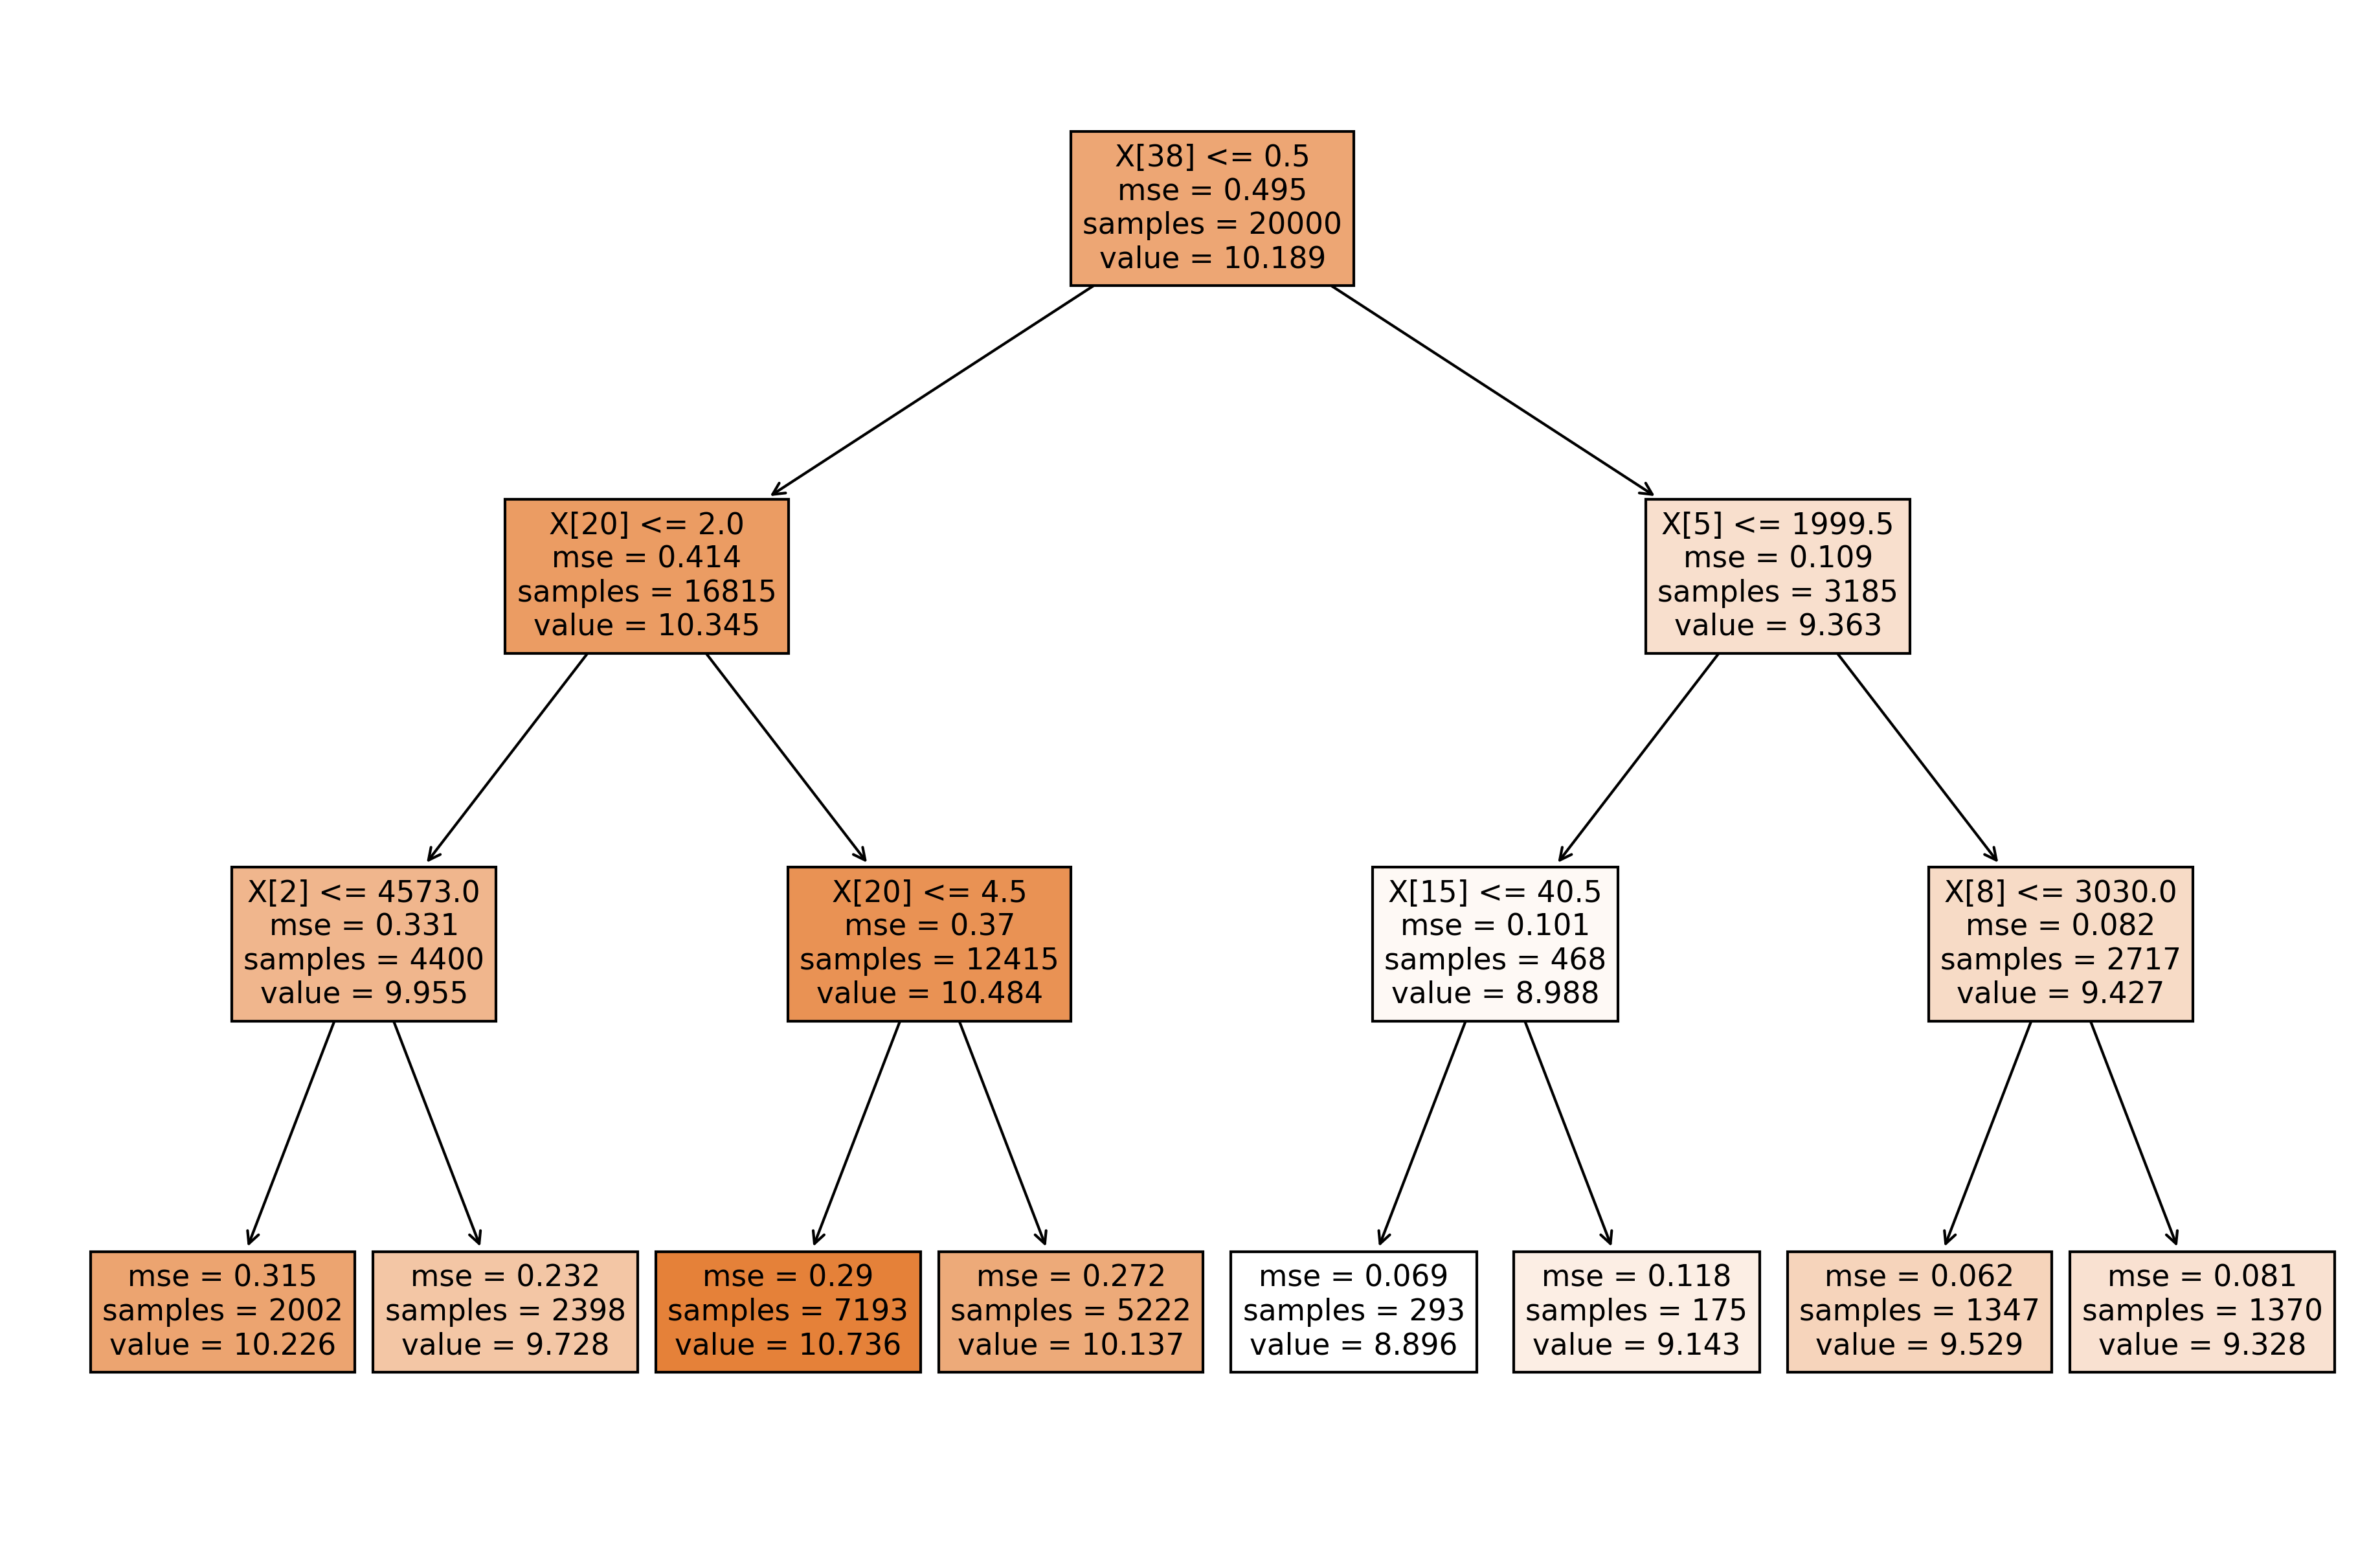

In [92]:
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (15, 10), dpi = 300)
plot_tree(model_dt, filled = True)

In [93]:
draw_tree(model_dt, X_small, precision = 3)

ExecutableNotFound: failed to execute ['dot', '-Kdot', '-Tsvg'], make sure the Graphviz executables are on your systems' PATH

**Option 2**: Using _sklearn.ensemble.RandomForestRegressor_

In [94]:
model_rf = RandomForestRegressor(
    # parameters shared with DecisionTreeRegressor
    n_estimators = 1, # 100 # 1 = the model is a single tree
    criterion = 'mse', 
    max_depth = 3, # None
    min_samples_split = 2, 
    min_samples_leaf = 1,
    min_weight_fraction_leaf = 0.0, 
    max_features = 'auto', 
    max_leaf_nodes = None, 
    min_impurity_decrease = 0.0, 
    min_impurity_split = None, 
    ccp_alpha = 0.0, 
    random_state = 42, # None, 
    
    # RandomForestRegressor specific hyperparameters
    bootstrap = False, # default = True 
    oob_score = False, 
    max_samples = None,

    # extra parameters
    warm_start = False, 
    n_jobs = -1, # None 
    verbose = 0, 
)

In [95]:
%time model_rf.fit(X_small, y_small)
print_score(model_rf, X_small, y_small, X_valid, y_valid)

CPU times: user 90 ms, sys: 15.7 ms, total: 106 ms
Wall time: 175 ms
RMSE on train set: 0.4966
RMSE on valid set: 0.5247
R^2 on train set: 0.5015
R^2 on valid set: 0.5084


In [96]:
# first install graphviz source files, see:
# https://forum.graphviz.org/t/new-simplified-installation-procedure-on-windows/224#abbreviated-installation-instructions-recommended-for-users-with-installation-experience

draw_tree(model_rf.estimators_[0], X_small, precision = 3)

ExecutableNotFound: failed to execute ['dot', '-Kdot', '-Tsvg'], make sure the Graphviz executables are on your systems' PATH

In [97]:
X_small.fiProductClassDesc

0        59
1        62
2        39
3         8
4        40
         ..
19995    67
19996    61
19997    27
19998    62
19999    35
Name: fiProductClassDesc, Length: 20000, dtype: int8

In [98]:
df_raw.fiProductClassDesc.tolist()[:50]

['Wheel Loader - 110.0 to 120.0 Horsepower',
 'Wheel Loader - 150.0 to 175.0 Horsepower',
 'Skid Steer Loader - 1351.0 to 1601.0 Lb Operating Capacity',
 'Hydraulic Excavator, Track - 12.0 to 14.0 Metric Tons',
 'Skid Steer Loader - 1601.0 to 1751.0 Lb Operating Capacity',
 'Backhoe Loader - 14.0 to 15.0 Ft Standard Digging Depth',
 'Hydraulic Excavator, Track - 21.0 to 24.0 Metric Tons',
 'Backhoe Loader - 14.0 to 15.0 Ft Standard Digging Depth',
 'Hydraulic Excavator, Track - 3.0 to 4.0 Metric Tons',
 'Wheel Loader - 350.0 to 500.0 Horsepower',
 'Backhoe Loader - 14.0 to 15.0 Ft Standard Digging Depth',
 'Track Type Tractor, Dozer - 20.0 to 75.0 Horsepower',
 'Hydraulic Excavator, Track - 19.0 to 21.0 Metric Tons',
 'Backhoe Loader - 14.0 to 15.0 Ft Standard Digging Depth',
 'Backhoe Loader - 14.0 to 15.0 Ft Standard Digging Depth',
 'Backhoe Loader - 14.0 to 15.0 Ft Standard Digging Depth',
 'Hydraulic Excavator, Track - 3.0 to 4.0 Metric Tons',
 'Hydraulic Excavator, Track - 4.0 to

Let's see what happens if we create a bigger tree.

In [99]:
model_dt = DecisionTreeRegressor(
    criterion = 'mse', # 'mse', 
    splitter = 'best', 
    max_depth = None,
    min_samples_split = 2, 
    min_samples_leaf = 1,
    min_weight_fraction_leaf = 0.0, 
    max_features = 'auto', 
    max_leaf_nodes = None, 
    min_impurity_decrease = 0.0, 
    min_impurity_split = None, 
    random_state = 42, # None,  
    ccp_alpha = 0.0, 
)

In [100]:
model_dt.fit(X_small, y_small)
print_score(model_dt, X_small, y_small, X_valid, y_valid)

RMSE on train set: 0.0000
RMSE on valid set: 0.4454
R^2 on train set: 1.0000
R^2 on valid set: 0.6457


<a id="tree_bagging"></a>

### $\bullet$ Tree bagging

[Back to top](#plan)

The training set result looks great! But the validation set is worse than our original model. This is why we need to use *bagging* of multiple trees to get more generalizable results. To learn about bagging in random forests, let's start with our basic model again.<br>

By the way, Bagging is the reduction of __B__oostrap **Agg**regation.

In [101]:
base_model = RandomForestRegressor(n_estimators = 10, n_jobs = -1, random_state = 42)

%time base_model.fit(X_small, y_small)
print_score(base_model, X_small, y_small, X_valid, y_valid)

CPU times: user 1.81 s, sys: 39.4 ms, total: 1.84 s
Wall time: 495 ms
RMSE on train set: 0.1033
RMSE on valid set: 0.3382
R^2 on train set: 0.9784
R^2 on valid set: 0.7957


In [102]:
base_model = RandomForestRegressor(n_estimators = 10, max_depth = 15, min_samples_split = 15, n_jobs = -1, random_state = 42)

%time base_model.fit(X_small, y_small)
print_score(base_model, X_small, y_small, X_valid, y_valid)

CPU times: user 1.3 s, sys: 9.62 ms, total: 1.31 s
Wall time: 362 ms
RMSE on train set: 0.1760
RMSE on valid set: 0.3318
R^2 on train set: 0.9374
R^2 on valid set: 0.8034


In [103]:
base_model = RandomForestRegressor(n_estimators = 10, n_jobs = -1, random_state = 42)

%time base_model.fit(X_train, y_train)
print_score(base_model, X_train, y_train, X_valid, y_valid)

CPU times: user 42.2 s, sys: 563 ms, total: 42.8 s
Wall time: 9.39 s
RMSE on train set: 0.0906
RMSE on valid set: 0.2493
R^2 on train set: 0.9828
R^2 on valid set: 0.8890


In [104]:
point = X_valid.iloc[0,:]
print(point)

price = y_valid[0]
print(price, np.exp(price))

SalesID                        4364751
MachineID                      2300944
ModelID                            665
datasource                         172
auctioneerID                         1
YearMade                          1999
MachineHoursCurrentMeter          3726
UsageBand                            2
saledate                          3581
fiModelDesc                       3232
fiBaseModel                       1111
fiSecondaryDesc                      0
fiModelSeries                       63
fiModelDescriptor                    0
ProductSize                          5
fiProductClassDesc                  17
state                               35
ProductGroup                         4
ProductGroupDesc                     4
Drive_System                         0
Enclosure                            1
Forks                                0
Pad_Type                             0
Ride_Control                         0
Stick                                0
Transmission             

In [105]:
# the model makes prediction with model.predict method
# base_model.predict

# predict takes a list as input, so we turn our single point as a list (with a single element)
base_model.predict([point])

# the model returns a list, so we take the first element, and apply exponetial
np.exp(base_model.predict([point])[0])

10076.438573159556

We'll grab the predictions for each individual tree, and look at one example.

In [106]:
# model prediction on single data point
trees = base_model
point = [X_valid.iloc[0, :]]
pred = trees.predict(point)

print('Type:', type(pred))
print('Shape:', pred.shape)
print('Value:', np.exp(pred[0]))

Type: <class 'numpy.ndarray'>
Shape: (1,)
Value: 10076.43857315954


In [107]:
# first tree prediction on single data point
tree = base_model.estimators_[0] # chose between 0 and 9 since we have 10 estimators
point = [X_valid.iloc[0, :]]     # tree.predict takes an iterable of data points as input
pred = tree.predict(point)       # tree.predict returns a numpy tensor of predictions as output

print('Type:', type(pred))
print('Shape:', pred.shape)
print('Value:', np.exp(pred[0]))

Type: <class 'numpy.ndarray'>
Shape: (1,)
Value: 9600.000000000004


In [108]:
# first tree prediction on single data point
tree = base_model.estimators_[1] # chose between 0 and 9 since we have 10 estimators
point = [X_valid.iloc[0, :]]     # tree.predict takes an iterable of data points as input
pred = tree.predict(point)       # tree.predict returns a numpy tensor of predictions as output

print('Type:', type(pred))
print('Shape:', pred.shape)
print('Value:', np.exp(pred[0]))

Type: <class 'numpy.ndarray'>
Shape: (1,)
Value: 22000.0


In [109]:
# all tree predictions on single data point
trees = base_model.estimators_
point = [X_valid.iloc[0, :]]
preds = np.asarray([tree.predict(point) for tree in trees])

print('Type:', type(preds))
print('Shape:', preds.shape)
print('Value:', np.exp(preds))

Type: <class 'numpy.ndarray'>
Shape: (10, 1)
Value: [[ 9600.]
 [22000.]
 [10000.]
 [ 8300.]
 [10000.]
 [ 9000.]
 [ 9000.]
 [10000.]
 [ 9500.]
 [ 8000.]]


In [110]:
# all tree predictions on all data
preds = np.stack([tree.predict(X_valid) for tree in base_model.estimators_]) # or np.asarray()

# predictions of the 10 trees, mean, and actual value (for first point in validation set)
preds.shape, preds[:,0], np.mean(preds[:,0]), y_valid[0]

((10, 12000),
 array([9.16952, 9.9988 , 9.21034, 9.02401, 9.21034, 9.10498, 9.10498, 9.21034, 9.15905, 8.9872 ]),
 9.217955163039694,
 9.104979856318357)

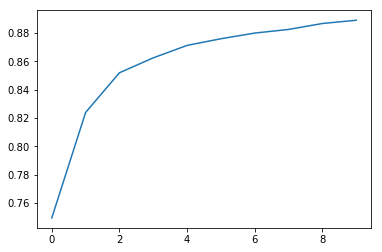

In [111]:
plt.plot([
    metrics.r2_score(y_valid, np.mean(preds[:num_trees], axis = 0)) 
    for num_trees in range(1, 11)
])

The shape of this curve suggests that adding more trees isn't going to help us much. Let's check. (Compare this to our original model on a sample)

In [112]:
model = RandomForestRegressor(n_estimators = 20, n_jobs = -1, random_state = 42)

%time model.fit(X_small, y_small)
print_score(model, X_small, y_small, X_valid, y_valid)

CPU times: user 3.87 s, sys: 289 ms, total: 4.16 s
Wall time: 788 ms
RMSE on train set: 0.0939
RMSE on valid set: 0.3289
R^2 on train set: 0.9822
R^2 on valid set: 0.8068


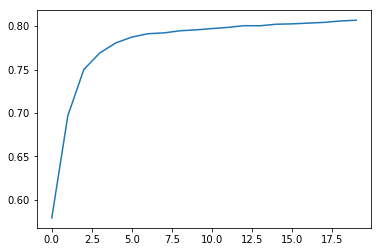

In [113]:
# all tree predictions on all data
preds = np.stack([tree.predict(X_valid) for tree in model.estimators_]) # or np.asarray()

# predictions of the 10 trees, mean, and actual value (for first point in validation set)
preds.shape, preds[:,0], np.mean(preds[:,0]), y_valid[0]

plt.plot([
    metrics.r2_score(y_valid, np.mean(preds[:num_trees], axis = 0)) 
    for num_trees in range(1, 21)
])

In [114]:
model = RandomForestRegressor(n_estimators = 30, n_jobs = -1, random_state = 42)

%time model.fit(X_small, y_small)
print_score(model, X_small, y_small, X_valid, y_valid)

CPU times: user 5.92 s, sys: 149 ms, total: 6.07 s
Wall time: 1.12 s
RMSE on train set: 0.0910
RMSE on valid set: 0.3253
R^2 on train set: 0.9833
R^2 on valid set: 0.8111


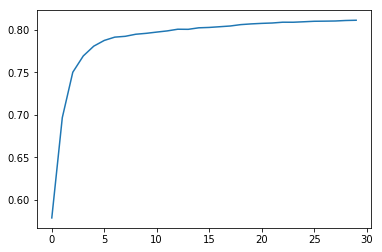

In [115]:
# all tree predictions on all data
preds = np.stack([tree.predict(X_valid) for tree in model.estimators_]) # or np.asarray()

# predictions of the 10 trees, mean, and actual value (for first point in validation set)
preds.shape, preds[:,0], np.mean(preds[:,0]), y_valid[0]

plt.plot([
    metrics.r2_score(y_valid, np.mean(preds[:num_trees], axis = 0)) 
    for num_trees in range(1, 31)
])

In [116]:
model = RandomForestRegressor(n_estimators = 40, n_jobs = -1, random_state = 42)

%time model.fit(X_small, y_small)
print_score(model, X_small, y_small, X_valid, y_valid)

CPU times: user 7.57 s, sys: 111 ms, total: 7.68 s
Wall time: 1.22 s
RMSE on train set: 0.0891
RMSE on valid set: 0.3237
R^2 on train set: 0.9839
R^2 on valid set: 0.8129


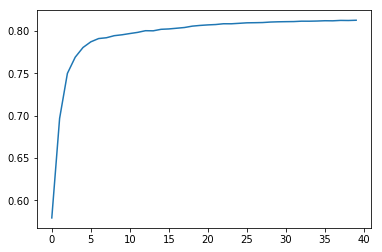

In [117]:
# all tree predictions on all data
preds = np.stack([tree.predict(X_valid) for tree in model.estimators_]) # or np.asarray()

# predictions of the 10 trees, mean, and actual value (for first point in validation set)
preds.shape, preds[:,0], np.mean(preds[:,0]), y_valid[0]

plt.plot([
    metrics.r2_score(y_valid, np.mean(preds[:num_trees], axis = 0)) 
    for num_trees in range(1, 41)
])

In [118]:
model = RandomForestRegressor(n_estimators = 40,  max_depth = 15, min_samples_split = 15, n_jobs = -1, random_state = 42)

%time model.fit(X_small, y_small)
print_score(model, X_small, y_small, X_valid, y_valid)

CPU times: user 5.29 s, sys: 96 ms, total: 5.38 s
Wall time: 888 ms
RMSE on train set: 0.1693
RMSE on valid set: 0.3202
R^2 on train set: 0.9421
R^2 on valid set: 0.8169


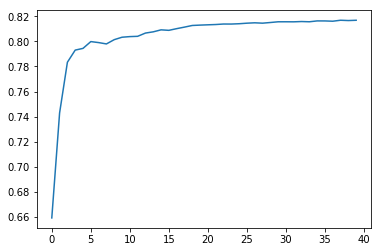

In [119]:
# all tree predictions on all data
preds = np.stack([tree.predict(X_valid) for tree in model.estimators_]) # or np.asarray()

# predictions of the 10 trees, mean, and actual value (for first point in validation set)
preds.shape, preds[:,0], np.mean(preds[:,0]), y_valid[0]

plt.plot([
    metrics.r2_score(y_valid, np.mean(preds[:num_trees], axis = 0)) 
    for num_trees in range(1, 41)
])

In [120]:
model = RandomForestRegressor(n_estimators = 200, n_jobs = -1, random_state = 42)

%time model.fit(X_small, y_small)
print_score(model, X_small, y_small, X_valid, y_valid)

CPU times: user 37.9 s, sys: 428 ms, total: 38.3 s
Wall time: 5.67 s
RMSE on train set: 0.0845
RMSE on valid set: 0.3191
R^2 on train set: 0.9856
R^2 on valid set: 0.8181


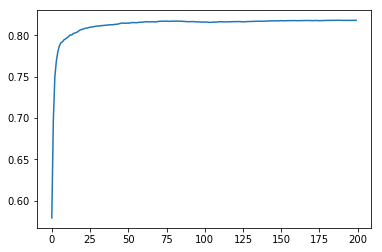

In [121]:
# all tree predictions on all data
preds = np.stack([tree.predict(X_valid) for tree in model.estimators_]) # or np.asarray()

# predictions of the 10 trees, mean, and actual value (for first point in validation set)
preds.shape, preds[:,0], np.mean(preds[:,0]), y_valid[0]

plt.plot([
    metrics.r2_score(y_valid, np.mean(preds[:num_trees], axis = 0)) 
    for num_trees in range(1, 201)
])

In [122]:
model = RandomForestRegressor(n_estimators = 200, max_depth = 15, min_samples_split = 15,  n_jobs = -1, random_state = 42)

%time model.fit(X_small, y_small)
print_score(model, X_small, y_small, X_valid, y_valid)

CPU times: user 27 s, sys: 252 ms, total: 27.3 s
Wall time: 4 s
RMSE on train set: 0.1674
RMSE on valid set: 0.3175
R^2 on train set: 0.9434
R^2 on valid set: 0.8199


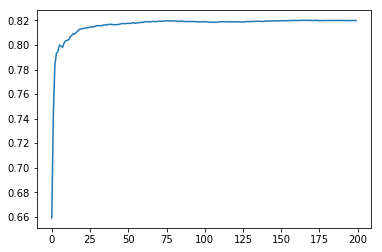

In [123]:
# all tree predictions on all data
preds = np.stack([tree.predict(X_valid) for tree in model.estimators_]) # or np.asarray()

# predictions of the 10 trees, mean, and actual value (for first point in validation set)
preds.shape, preds[:,0], np.mean(preds[:,0]), y_valid[0]

plt.plot([
    metrics.r2_score(y_valid, np.mean(preds[:num_trees], axis = 0)) 
    for num_trees in range(1, 201)
])

<a id='oob_score'></a>

### $\bullet$ Out-of-bag (OOB) score

[Back to top](#plan)

Is our validation set worse than our training set because we're over-fitting, or because the validation set is for a different time period, or a bit of both? With the existing information we've shown, we can't tell. However, random forests have a very clever trick called *out-of-bag (OOB) error* which can handle this (and more!)

The idea is to calculate error on the training set, but only include the trees in the calculation of a row's error where that row was *not* included in training that tree. This allows us to see whether the model is over-fitting, without needing a separate validation set.

This also has the benefit of allowing us to see whether our model generalizes, even if we only have a small amount of data so want to avoid separating some out to create a validation set.

This is as simple as adding one more parameter to our model constructor. We print the OOB error last in our `print_score` function below.

In [124]:
model = RandomForestRegressor(
    n_estimators = 40, 
    n_jobs = -1, 
    random_state = 42,
    
    bootstrap = True,
    oob_score = True, # default = False, 
    max_samples = None,
)

%time model.fit(X_small, y_small)
print_score(model, X_small, y_small, X_valid, y_valid)

CPU times: user 7.58 s, sys: 133 ms, total: 7.71 s
Wall time: 1.49 s
RMSE on train set: 0.0891
RMSE on valid set: 0.3237
R^2 on train set: 0.9839
R^2 on valid set: 0.8129
R^2 on oob set: 0.8846


Bagging trick :

| -| Tree 1  | Tree 2 |
|-----|-----|-----|
|Data 1 | (2 times) | - |
|Data 2  | (1 time) |(2 times) |
|Data 3 | - |(1 time) |

$$
R^2 \text{ on train set } > R^2 \text{ on oob set } \implies \text{ The model is overfitting} \\ 
R^2 \text{ on oob set } > R^2 \text{ on valid set } \implies \text{ Training / Validation sets carry differences} \\
$$

In [125]:
model = RandomForestRegressor(
    n_estimators = 40, 
    n_jobs = -1, 
    random_state = 42,
    
    bootstrap = True,
    oob_score = True, # default = False, 
    max_samples = None,
)

%time model.fit(X_train, y_train)
print_score(model, X_train, y_train, X_valid, y_valid)

CPU times: user 2min 59s, sys: 2.4 s, total: 3min 2s
Wall time: 30.2 s
RMSE on train set: 0.0788
RMSE on valid set: 0.2367
R^2 on train set: 0.9870
R^2 on valid set: 0.9000
R^2 on oob set: 0.9078


<a id='tree_pruning'></a>

### $\bullet$ Stopping criteria

[Back to top](#plan)

A way to reduce over-fitting is to grow our trees less deeply. We do this by specifying (with `min_samples_leaf` and `min_samples_split`) that we require some minimum number of rows in every leaf node. This has two benefits:

- There are less decision rules for each leaf node; simpler models should generalize better
- The predictions are made by averaging more rows in the leaf node, resulting in less volatility

In [126]:
def decision_tree_max_depth(tree):
    children_left = tree.children_left
    children_right = tree.children_right

    def walk(node_id):
        if (children_left[node_id] != children_right[node_id]):
            left_max = 1 + walk(children_left[node_id])
            right_max = 1 + walk(children_right[node_id])
            return max(left_max, right_max)
        else: # leaf
            return 1

    root_node_id = 0
    return walk(root_node_id)

Baseline model

In [127]:
model = RandomForestRegressor(
    n_estimators = 40, 
    n_jobs = -1, 
    random_state = 42,
    
    bootstrap = True,
    oob_score = True, # default = False, 
    max_samples = None,
)

%time model.fit(X_small, y_small)
print_score(model, X_small, y_small, X_valid, y_valid)

CPU times: user 7.9 s, sys: 80.2 ms, total: 7.98 s
Wall time: 1.55 s
RMSE on train set: 0.0891
RMSE on valid set: 0.3237
R^2 on train set: 0.9839
R^2 on valid set: 0.8129
R^2 on oob set: 0.8846


In [128]:
tree = model.estimators_[0].tree_

decision_tree_max_depth(tree)

33

In [129]:
model = RandomForestRegressor(
    n_estimators = 40, 
    min_samples_split = 15,
    min_samples_leaf = 15,
    n_jobs = -1, 
    random_state = 42,
    
    bootstrap = True,
    oob_score = True, # default = False, 
    max_samples = None,
)

%time model.fit(X_small, y_small)
print_score(model, X_small, y_small, X_valid, y_valid)

CPU times: user 5.04 s, sys: 58.4 ms, total: 5.09 s
Wall time: 985 ms
RMSE on train set: 0.2208
RMSE on valid set: 0.3277
R^2 on train set: 0.9014
R^2 on valid set: 0.8082
R^2 on oob set: 0.8650


In [130]:
tree = model.estimators_[0].tree_

decision_tree_max_depth(tree)

21

<a id='data_sampling'></a>

### $\bullet$ Data subsampling

[Back to top](#plan)

It turns out that one of the easiest ways to avoid over-fitting is also one of the best ways to speed up analysis: *subsampling*.<br>

**Let's return to using our full dataset**, so that we can demonstrate the impact of this technique.<br>

The basic idea is this: rather than limit the total amount of data that our model can access, let's instead limit it to a *different* random subset per tree. That way, given enough trees, the model can still see *all* the data, but for each individual tree it'll be just as fast as if we had cut down our dataset as before.

In [131]:
model = RandomForestRegressor(
    n_estimators = 40,
    n_jobs = -1, 
    random_state = 42,
    
    bootstrap = True,
    oob_score = True, # default = False, 
    max_samples = None,
)

%time model.fit(X_train, y_train)
print_score(model, X_train, y_train, X_valid, y_valid)

CPU times: user 2min 59s, sys: 2.63 s, total: 3min 1s
Wall time: 30.7 s
RMSE on train set: 0.0788
RMSE on valid set: 0.2367
R^2 on train set: 0.9870
R^2 on valid set: 0.9000
R^2 on oob set: 0.9078


In [132]:
model = RandomForestRegressor(
    n_estimators = 40,
    n_jobs = -1, 
    random_state = 42,
    
    bootstrap = True,
    oob_score = True, # default = False, 
    max_samples = 0.15, # default = None,
)

%time model.fit(X_train, y_train)
print_score(model, X_train, y_train, X_valid, y_valid)

CPU times: user 43 s, sys: 585 ms, total: 43.5 s
Wall time: 9.42 s
RMSE on train set: 0.1895
RMSE on valid set: 0.2434
R^2 on train set: 0.9249
R^2 on valid set: 0.8942
R^2 on oob set: 0.8991


In [133]:
model = RandomForestRegressor(
    n_estimators = 200,
    n_jobs = -1, 
    random_state = 42,
    
    bootstrap = True,
    oob_score = True, # default = False, 
    max_samples = 0.15, # default = None,
)

%time model.fit(X_train, y_train)
print_score(model, X_train, y_train, X_valid, y_valid)

CPU times: user 3min 47s, sys: 3.18 s, total: 3min 50s
Wall time: 45.1 s
RMSE on train set: 0.1861
RMSE on valid set: 0.2401
R^2 on train set: 0.9276
R^2 on valid set: 0.8970
R^2 on oob set: 0.9024


<a id='feature_sampling'></a>

### $\bullet$ Feature subsampling

[Back to top](#plan)

In [134]:
X_train.shape

(389125, 54)

We can also increase the amount of variation amongst the trees by not only use a sample of rows for each tree, but to also using a sample of *columns* for each *split*. We do this by specifying `max_features`, which is the proportion of features to randomly select from at each split.

- None
- 0.5
- 'sqrt'

In [135]:
model = RandomForestRegressor(
    n_estimators = 40,
    #max_features = 0.5, # default = 'auto'/None
    n_jobs = -1, 
    random_state = 42,
    
    bootstrap = True,
    oob_score = True, # default = False, 
    max_samples = None,
)

%time model.fit(X_small, y_small)
print_score(model, X_small, y_small, X_valid, y_valid)

CPU times: user 7.63 s, sys: 128 ms, total: 7.75 s
Wall time: 1.36 s
RMSE on train set: 0.0891
RMSE on valid set: 0.3237
R^2 on train set: 0.9839
R^2 on valid set: 0.8129
R^2 on oob set: 0.8846


In [136]:
model = RandomForestRegressor(
    n_estimators = 40,
    max_features = 0.5, # default = 'auto'/None
    n_jobs = -1, 
    random_state = 42,
    
    bootstrap = True,
    oob_score = True, # default = False, 
    max_samples = None,
)

%time model.fit(X_small, y_small)
print_score(model, X_small, y_small, X_valid, y_valid)

CPU times: user 4.07 s, sys: 37.5 ms, total: 4.1 s
Wall time: 779 ms
RMSE on train set: 0.0855
RMSE on valid set: 0.3161
R^2 on train set: 0.9852
R^2 on valid set: 0.8216
R^2 on oob set: 0.8937


In [137]:
model = RandomForestRegressor(
    n_estimators = 40,
    max_features = 0.5, # default = 'auto'/None
    n_jobs = -1, 
    random_state = 42,
    
    bootstrap = True,
    oob_score = True, # default = False, 
    max_samples = None,
)

%time model.fit(X_train, y_train)
print_score(model, X_train, y_train, X_valid, y_valid)

CPU times: user 1min 36s, sys: 1.78 s, total: 1min 38s
Wall time: 17.9 s
RMSE on train set: 0.0775
RMSE on valid set: 0.2304
R^2 on train set: 0.9874
R^2 on valid set: 0.9052
R^2 on oob set: 0.9108


Let us plot the oob error as a function of the number of trees, for some feature sampling euristics (see [sklearn documentation](http://scikit-learn.org/stable/auto_examples/ensemble/plot_ensemble_oob.html))

/Users/yanismartinet/opt/anaconda3/envs/fastai-cpu-v0.7/lib/python3.6/site-packages/sklearn/ensemble/_forest.py:833: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/yanismartinet/opt/anaconda3/envs/fastai-cpu-v0.7/lib/python3.6/site-packages/sklearn/ensemble/_forest.py:833: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/yanismartinet/opt/anaconda3/envs/fastai-cpu-v0.7/lib/python3.6/site-packages/sklearn/ensemble/_forest.py:833: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/yanismartinet/opt/anaconda3/envs/fastai-cpu-v0.7/lib/python3.6/site-packages/sklearn/ensemble/_forest.py:833

/Users/yanismartinet/opt/anaconda3/envs/fastai-cpu-v0.7/lib/python3.6/site-packages/sklearn/ensemble/_forest.py:833: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/yanismartinet/opt/anaconda3/envs/fastai-cpu-v0.7/lib/python3.6/site-packages/sklearn/ensemble/_forest.py:833: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/yanismartinet/opt/anaconda3/envs/fastai-cpu-v0.7/lib/python3.6/site-packages/sklearn/ensemble/_forest.py:833: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/yanismartinet/opt/anaconda3/envs/fastai-cpu-v0.7/lib/python3.6/site-packages/sklearn/ensemble/_forest.py:833

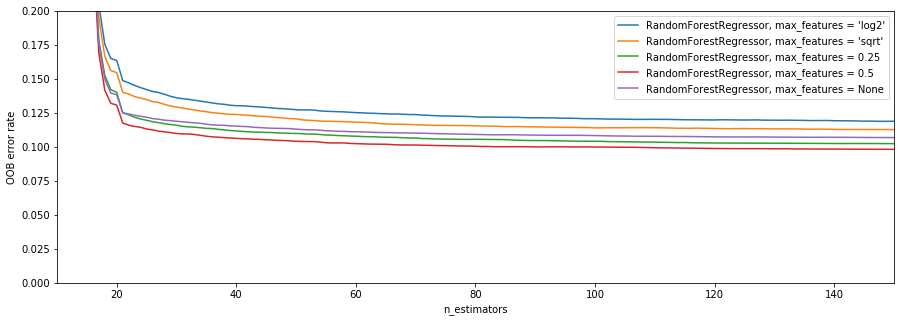

In [138]:
logging.info('warn')

# NOTE: Setting the `warm_start` construction parameter to `True` disables
# support for parallelized ensembles but is necessary for tracking the OOB
# error trajectory during training.
ensemble_clfs = [
    ("RandomForestRegressor, max_features = 'log2'",
        RandomForestRegressor(
            warm_start = True, 
            oob_score = True,
            max_features = "log2",
            random_state = 42)),
    ("RandomForestRegressor, max_features = 'sqrt'",
        RandomForestRegressor(
            warm_start = True, 
            oob_score = True,
            max_features = "sqrt",
            random_state = 42)),
    ("RandomForestRegressor, max_features = 0.25",
        RandomForestRegressor(
            warm_start = True, 
            oob_score = True,
            max_features = 0.25,
            random_state = 42)),
    ("RandomForestRegressor, max_features = 0.5",
        RandomForestRegressor(
            warm_start = True, 
            oob_score = True,
            max_features = 0.5,
            random_state = 42)),
    ("RandomForestRegressor, max_features = None",
        RandomForestRegressor(
            warm_start = True, 
            oob_score = True,
            max_features = None,
            random_state = 42)),
]

# Map a classifier name to a list of (<n_estimators>, <error rate>) pairs.
error_rate = OrderedDict((label, []) for label, _ in ensemble_clfs)

# Range of `n_estimators` values to explore.
min_estimators = 10
max_estimators = 150

for label, clf in ensemble_clfs:
    for i in range(min_estimators, max_estimators + 1):
        clf.set_params(n_estimators = i)
        clf.fit(X_small, y_small)

        # Record the OOB error for each `n_estimators=i` setting.
        oob_error = 1 - clf.oob_score_
        error_rate[label].append((i, oob_error))

# Generate the "OOB error rate" vs. "n_estimators" plot.
plt.figure(figsize = (15, 5))
for label, clf_err in error_rate.items():
    xs, ys = zip(*clf_err)
    plt.plot(xs, ys, label = label)

# Show the plot
plt.xlim(min_estimators, max_estimators)
plt.ylim(0., 0.2)
plt.xlabel("n_estimators")
plt.ylabel("OOB error rate")
plt.legend(loc = "upper right")
plt.show()

#### Combining all together

In [139]:
model = RandomForestRegressor(
    n_estimators = 100,
    min_samples_split = 10,
    max_features = 0.5, # default = 'auto'/None
    n_jobs = -1, 
    random_state = 42,
    
    bootstrap = True,
    oob_score = True, # default = False, 
    max_samples = 0.75, # default = None,
)

%time model.fit(X_small, y_small)
print_score(model, X_small, y_small, X_valid, y_valid)

CPU times: user 6.62 s, sys: 168 ms, total: 6.79 s
Wall time: 1.24 s
RMSE on train set: 0.1489
RMSE on valid set: 0.3107
R^2 on train set: 0.9552
R^2 on valid set: 0.8276
R^2 on oob set: 0.8943


In [140]:
model = RandomForestRegressor(
    n_estimators = 100,
    min_samples_split = 15,
    max_features = 0.75, # default = 'auto'/None
    n_jobs = -1, 
    random_state = 42,
    
    bootstrap = True,
    oob_score = True, # default = False, 
    max_samples = 0.75, # default = None,
)

%time model.fit(X_train, y_train)
print_score(model, X_train, y_train, X_valid, y_valid)

CPU times: user 4min 17s, sys: 2 s, total: 4min 19s
Wall time: 40.8 s
RMSE on train set: 0.1473
RMSE on valid set: 0.2297
R^2 on train set: 0.9546
R^2 on valid set: 0.9058
R^2 on oob set: 0.9125


<a id='general_bagging'></a>

### $\bullet$ Bagging as general Ensemble method

[Back to top](#plan)

The Bagging (Bootstrap Aggregation) strategy does not need to be applied to trees only, it can be applied to many different base models. This is done using the `BaggingRegressor` meta-model.<br>

A model generated with `RandomForestRegressor` is almost identical to a model instanciated from `BaggingRegressor`over a base `DecisionTreeRegressor`, with two differences:
- It has its own implementation, making it faster for training
- The feature sampling is _different at every tree node_ (when used)

The 2nd aspect does not hold for models instanciated with `BaggingRegressor`, where feature sampling is done _once and for all_ for each tree at instanciation.

In [141]:
# native Random Forest
model = RandomForestRegressor(
    n_estimators = 100,
    min_samples_split = 2,
    max_features = 0.5, # default = 'auto'/None
    n_jobs = -1, 
    random_state = 42,
    
    bootstrap = True,
    oob_score = True, # default = False, 
    max_samples = None,
)

%time model.fit(X_small, y_small)
print_score(model, X_small, y_small, X_valid, y_valid)

CPU times: user 11.6 s, sys: 69.2 ms, total: 11.7 s
Wall time: 1.99 s
RMSE on train set: 0.0821
RMSE on valid set: 0.3104
R^2 on train set: 0.9864
R^2 on valid set: 0.8279
R^2 on oob set: 0.9001


In [142]:
# Random Forest built using the Bagging meta-model
base_model = DecisionTreeRegressor(
    criterion = 'mse', # 'mse', 
    splitter = 'best', 
    max_depth = None,
    min_samples_split = 2, 
    min_samples_leaf = 1,
    min_weight_fraction_leaf = 0.0, 
    max_features = 'auto', 
    max_leaf_nodes = None, 
    min_impurity_decrease = 0.0, 
    min_impurity_split = None,  
    ccp_alpha = 0.0,
    random_state = 42, # None, 
)

model = BaggingRegressor(
    base_estimator = base_model, 
    n_estimators = 100, 

    max_features = 0.5, 
    max_samples = 1.0, 
    
    bootstrap = True, 
    bootstrap_features = False, 
    oob_score = True, 
    
    warm_start = False, 
    n_jobs = -1, 
    random_state = 42, 
    verbose = 0,
)

%time model.fit(X_small, y_small)
print_score(model, X_small, y_small, X_valid, y_valid)

CPU times: user 1.48 s, sys: 404 ms, total: 1.88 s
Wall time: 5.15 s
RMSE on train set: 0.0882
RMSE on valid set: 0.3157
R^2 on train set: 0.9843
R^2 on valid set: 0.8220
R^2 on oob set: 0.8878


<a id='cross_validation'></a>

### $\bullet$ Cross validation

[Back to top](#plan)

Random Forests, and more generally Bagging models, come natively with the computation of an out-of-bag score. Non-ensemblist methods does not come with such score, and an alternative is to consider a **Cross validation score**. This score can be computationally expensive, but does not waste too much data (as is the case when fixing an arbitrary validation set).

In $k$-fold CV, the training set is split into $k$ smaller sets (by default $k$ consecutive evenly-sized splits, with $k=5$). The following procedure is followed for each of the $k$ “folds”:

- A model is trained using $k-1$ of the folds as training data;
- the resulting model is validated on the remaining part of the data (i.e., it is used as a test set to compute the model's `score` method).

The performance measure reported by $k$-fold cross-validation is then the average of the values computed in the loop. 


<img src="img/cross_valid.png" alt="" style="width: 40%"/>
<center>
Cross validation
</center>

See the [scikitlearn documentation](https://scikit-learn.org/stable/modules/cross_validation.html#cross-validation)

This score is dependant on some parameters, such as the number $k$ of folds. Cross validation is also useful for Random Forests when performing **hyperparameter tuning**, addressed in next paragraph.

In [143]:
# native Random Forest
model = RandomForestRegressor(
    n_estimators = 100,
    min_samples_split = 2,
    max_features = None, # default = 'auto'/None
    n_jobs = -1, 
    random_state = 42,
    
    bootstrap = True,
    oob_score = True, # default = False, 
    max_samples = None,
)

%time model.fit(X_small, y_small)
print_score(model, X_small, y_small, X_valid, y_valid)

CPU times: user 19 s, sys: 342 ms, total: 19.3 s
Wall time: 3.28 s
RMSE on train set: 0.0855
RMSE on valid set: 0.3209
R^2 on train set: 0.9852
R^2 on valid set: 0.8161
R^2 on oob set: 0.8916


In [144]:
# default is cv = 5
scores = cross_val_score(model, X_small, y_small, cv = 8, n_jobs = -1)

print(scores)
print("r2 is {:.3f} with a standard deviation of {:.3f}".format(scores.mean(), scores.std()))

[0.88125 0.88697 0.89592 0.88853 0.87951 0.87685 0.87467 0.84675]
r2 is 0.879 with a standard deviation of 0.014


- Cross validation with a randomized splitting strategy.<br>
This strategy is recommended when the data does not follow a particular order, but *should be avoided for ordered data* (ex data with a temporal ordering).

In [145]:
help(model.score)

Help on method score in module sklearn.base:

score(X, y, sample_weight=None) method of sklearn.ensemble._forest.RandomForestRegressor instance
    Return the coefficient of determination :math:`R^2` of the
    prediction.
    
    The coefficient :math:`R^2` is defined as :math:`(1 - \frac{u}{v})`,
    where :math:`u` is the residual sum of squares ``((y_true - y_pred)
    ** 2).sum()`` and :math:`v` is the total sum of squares ``((y_true -
    y_true.mean()) ** 2).sum()``. The best possible score is 1.0 and it
    can be negative (because the model can be arbitrarily worse). A
    constant model that always predicts the expected value of `y`,
    disregarding the input features, would get a :math:`R^2` score of
    0.0.
    
    Parameters
    ----------
    X : array-like of shape (n_samples, n_features)
        Test samples. For some estimators this may be a precomputed
        kernel matrix or a list of generic objects instead with shape
        ``(n_samples, n_samples_fitted)``, 

In [146]:
# randomized splitting strategy
cv = KFold(n_splits = 8, shuffle = True, random_state = 42)

scores = cross_val_score(model, X_small, y_small, cv = cv, n_jobs = -1)

print(scores)
print("r2 is {:.3f} with a standard deviation of {:.3f}".format(scores.mean(), scores.std()))

[0.88937 0.8905  0.89137 0.89028 0.8994  0.88713 0.89104 0.88157]
r2 is 0.890 with a standard deviation of 0.005


- Change the score formula (ex: switch from $R^2$ to Root Mean Squared Error)

In [147]:
scores = cross_val_score(model, X_small, y_small, cv = 8, scoring = 'r2', n_jobs = -1)

print(scores)
print("r2 is {:.3f} with a standard deviation of {:.3f}".format(scores.mean(), scores.std()))

[0.88125 0.88697 0.89592 0.88853 0.87951 0.87685 0.87467 0.84675]
r2 is 0.879 with a standard deviation of 0.014


In [148]:
scores = cross_val_score(model, X_small, y_small, cv = 8, scoring = 'neg_root_mean_squared_error', n_jobs = -1)

print(scores)
print("RMSE is {:.3f} with a standard deviation of {:.3f}".format(-scores.mean(), scores.std()))

[-0.24339 -0.23182 -0.22132 -0.23138 -0.24444 -0.25685 -0.25317 -0.2712 ]
RMSE is 0.244 with a standard deviation of 0.015


In [149]:
# list of possible keys for scoring
sorted(sklearn.metrics.SCORERS.keys())

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'max_error',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_absolute_percentage_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_root_mean_squared_error',
 'normalized_mutual_info_score',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'rand_score',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',
 'roc_auc',
 'roc_auc_ovo',
 'roc_auc_ovo_weighted',
 'roc_auc_ovr',
 'roc_auc_ovr_we

<a id='hyperparameter_tuning'></a>

### $\bullet$ Hyperparameter tuning for final model selection

[Back to top](#plan)

Hyper-parameters are parameters that are not directly learnt by calling the model's `fit` method. These hyperparameters are usually set manually, and each different choice will lead to a possibly different result when computing the model's score on a test set. It is however important **not to finetune these hyperparameters on results obtained on the test set**: They must instead be selected using either a dedicated validation set, or through cross validation. 

<img src="img/hyperparameter_tuning.png" alt="" style="width: 40%"/>
<center>
$\textit{Place of Hyperparameter tuning in the process of building a prediction model}$
</center>


<br>
It is completely ok for a Data Scientist to calibrate a model's hyperparameters manually on a separate validation set, as it also informs on the most impacting ones. To complete this approach, we describe here automatic hyperparameter finetuning with cross validation.

Concretely, a hyperparameter search consists of:

- an estimator (classifier or regressor such as `RandomForestRegressor`)

- a parameter space

- a method for searching or sampling candidate parameters

- a cross-validation scheme

- a score function

Two generic approaches to parameter search are provided in scikit-learn: for given values, `GridSearchCV` exhaustively considers all parameter combinations, while `RandomizedSearchCV` can sample a given number of candidates from a parameter space with a specified distribution. Both these tools have successive halving counterparts `HalvingGridSearchCV` and `HalvingRandomSearchCV`, which can be much faster at finding a good parameter combination.



See the [scikitlearn documentation](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html#sklearn.model_selection.GridSearchCV)

In [72]:
model.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': -1,
 'oob_score': True,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [76]:
# several grids can be cast into a list
# here we provide only one grid
param_grid = [
    {'n_estimators': [5, 10],
     'max_depth': [10, 20, None],
     'min_samples_split': [2, 10, 50],
     'max_features': [0.25, 0.5, 0.75],
     'max_samples': [0.2, 0.5, 1],
    },
 ]

model = RandomForestRegressor(
    random_state = 42,
    bootstrap = True,
)

In [79]:
tuned_model = GridSearchCV(
    estimator = model, 
    param_grid = param_grid, 
    scoring = None, # uses estimator's default score method
    n_jobs = -1, 
    refit = True, # keep a fitted version of the overall best model
    cv = 5, 
    return_train_score = True,
    verbose = 2,
)

In [80]:
tuned_model.fit(X_small, y_small)

Fitting 5 folds for each of 162 candidates, totalling 810 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid=[{'max_depth': [10, 20, None],
                          'max_features': [0.25, 0.5, 0.75],
                          'max_samples': [0.2, 0.5, 1],
                          'min_samples_split': [2, 10, 50],
                          'n_estimators': [5, 10]}],
             return_train_score=True, verbose=2)

In [88]:
best_model = tuned_model.best_estimator_
best_model

RandomForestRegressor(max_features=0.5, max_samples=0.5, n_estimators=10,
                      random_state=42)

In [85]:
print_score(best_model, X_small, y_small, X_valid, y_valid)

RMSE on train set: 0.1590
RMSE on valid set: 0.3370
R^2 on train set: 0.9489
R^2 on valid set: 0.7972


In [93]:
# randomized splitting strategy
cv = KFold(n_splits = 5, shuffle = True, random_state = 42)

scores = cross_val_score(best_model, X_small, y_small, cv = cv, n_jobs = -1)

print(scores)
print("r2 is {:.3f} with a standard deviation of {:.3f}".format(scores.mean(), scores.std()))

[0.87758 0.86855 0.87452 0.8693  0.86737]
r2 is 0.871 with a standard deviation of 0.004


# 4. Classification, and what changes from Regression

[Back to top](#plan)

Differences for Classification

- probabilistic predictor
- evaluation for binary clasifiers : 4 indicators, AUC
- evaluation of general clasifiers : per-class indicators, averages
- ovo and ovr strategies

<a id='random_forest_classifier'></a>

### $\bullet$ Random Forest Classifier

[Back to top](#plan)

We shall change our target variable from log sale prices to a set of _categorical sale prices_. Then we will use the `RandomForestClassifier` model to compute prediction.

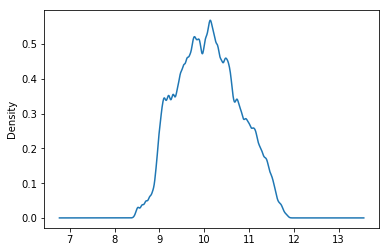

In [12]:
pd.Series(y_train).plot(kind = 'density', bw_method = 0.05)

# alternatively
# sns.set_style('whitegrid')
# sns.kdeplot(np.array(y_train), bw_method = 0.05)

We will recast the sale Price prediction problem as a _binary classification_ problem:

In [19]:
n_classes = 2

# intervals are taken along the median (10.165):
# ]8.463, 10.165]
# ]10.165, 11.864]
intervals = pd.cut(y, bins = n_classes)

In [22]:
intervals[:5].tolist()

[Interval(10.165, 11.864, closed='right'),
 Interval(10.165, 11.864, closed='right'),
 Interval(8.463, 10.165, closed='right'),
 Interval(10.165, 11.864, closed='right'),
 Interval(8.463, 10.165, closed='right')]

In [23]:
type(intervals[0])

pandas._libs.interval.Interval

In [24]:
label_encoder = LabelEncoder()

y_cat = label_encoder.fit_transform(intervals)

In [25]:
y_cat[:5]

array([1, 1, 0, 1, 0])

In [27]:
label_encoder.classes_.tolist()

[Interval(8.463, 10.165, closed='right'),
 Interval(10.165, 11.864, closed='right')]

In [26]:
y_cat_train, y_cat_valid = split_vals(y_cat, n_train)
y_cat_small, _ = split_vals(y_cat, n_small)

y_cat_train.shape, y_cat_valid.shape, y_cat_small.shape

((389125,), (12000,), (20000,))

In [32]:
classifier = RandomForestClassifier(
    n_estimators = 100, 
    class_weight = None, # classifier specific
    criterion = 'gini',  # classifier specific
    max_depth = None, 
    min_samples_split = 2, 
    min_samples_leaf = 1, 
    min_weight_fraction_leaf = 0.0, 
    max_features = 'auto', 
    max_leaf_nodes = None, 
    min_impurity_decrease = 0.0, 
    min_impurity_split = None, 
    ccp_alpha = 0.0, 
    random_state = 42, 
    bootstrap = True, 
    oob_score = True, 
    max_samples = None,
    warm_start = False, 
    n_jobs = -1, 
    verbose = 0, 
)

In [34]:
%time classifier.fit(X_small, y_cat_small)

Wall time: 1.69 s


RandomForestClassifier(n_jobs=-1, oob_score=True, random_state=42)

In [35]:
# classification accuracy on validation set
classifier.score(X_valid, y_cat_valid)

0.8841666666666667

In [36]:
# classification accuracy on oob samples
classifier.oob_score_

0.921

<a id='binary_classifier_scoring'></a>

### $\bullet$ Binary classifier scoring

[Back to top](#plan)


<img src="img/precision_recall_specificity.bmp" alt="" style="width: 50%"/>
<center>
The four metrics for binary classification
</center>

In [ ]:
# TODO

<a id='multiclass_classifier_scoring'></a>

### $\bullet$ Multiclass classifier scoring

[Back to top](#plan)


In [ ]:
# TODO

<a id='model_calibration'></a>

### $\bullet$ Model calibration

[Back to top](#plan)


In [ ]:
# TODO

<a id='bottom'></a>

[Back to top](#plan)